# CMSC 478 Machine Learning Project
Music Genre Classifier

Austin John

In [ ]:
%pip install -r requirements.txt

In [7]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
import pickle
import librosa
import librosa.display as lplt
import tensorflow as tf
import sklearn
from IPython.display import Audio
from tkinter import TclError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from tensorflow import keras as k
from keras.models import Sequential

In [8]:
# Import the csv file containing all the audio feature details
data = pd.read_csv("/home/anonymous/478/Data/features_30_sec.csv", delimiter=",")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [9]:
data.shape

(1000, 60)

# Visualization - Signal Waves, Power Spectograms, Zero Crossing Rate, Spectral Centroids and Chroma Features

In [ ]:
# Change the directory - easier for the for loop
os.chdir('Data/genres_original')
os.getcwd()

'/home/anonymous/478/Data/genres_original'

blues


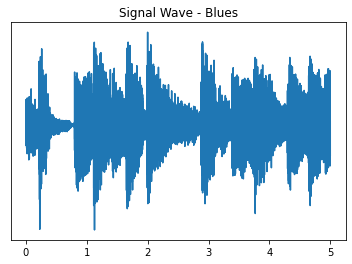

classical


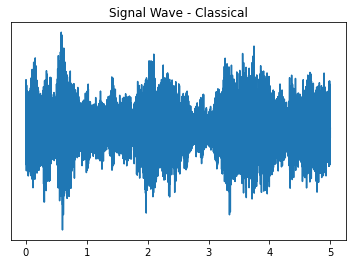

country


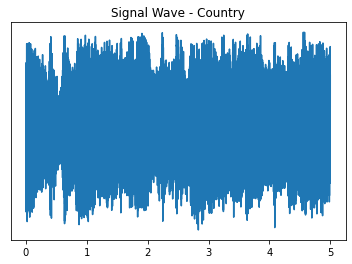

disco


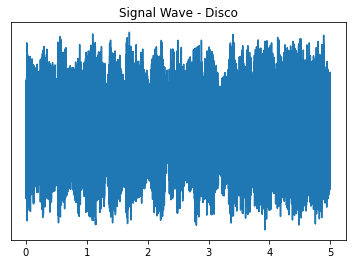

hiphop


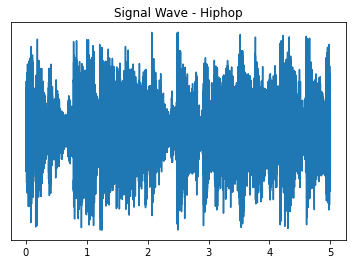

jazz


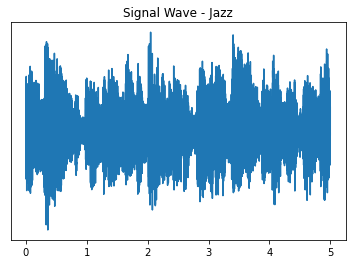

metal


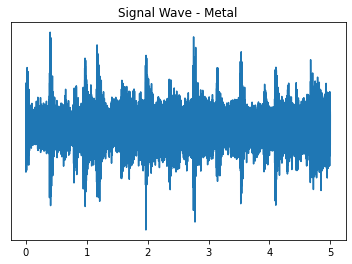

pop


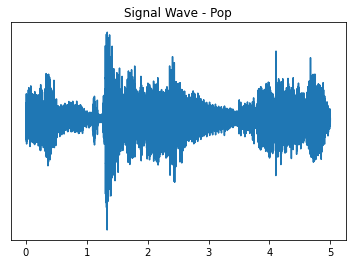

reggae


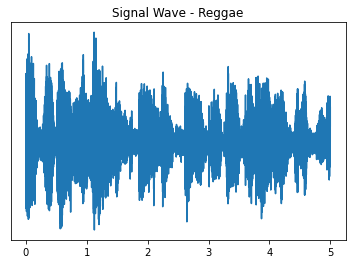

rock


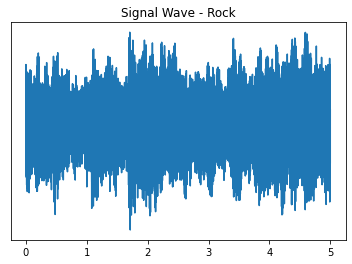

In [ ]:
# Generate Signal Waves for all genres with Librosa

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

# Iterate through the genre list and create signal waves
for i, genre in enumerate(genres):
    print(genre)
    y, sr = librosa.load(genre + '/' + genre + '.00005.wav', duration = 5.0, sr = None)
    time = np.linspace(0, len(y)/sr, num = len(y))

    plt.figure(i + 1)
    plt.title("Signal Wave - " + genre.capitalize())
    plt.plot(time, y)
    plt.yticks(ticks=[])
    # plt.savefig(fname=genre+'_time_domain.png', dpi=200)

    plt.show()

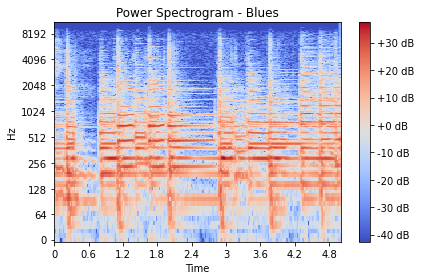

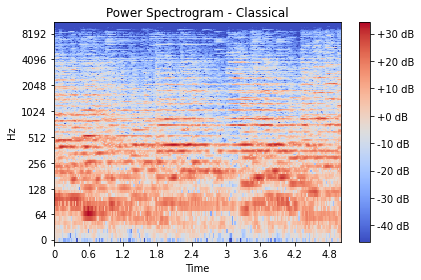

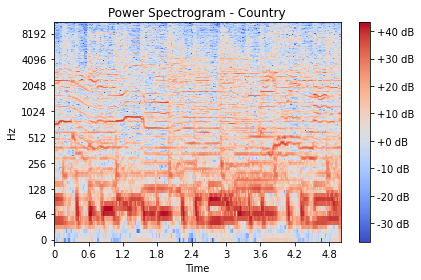

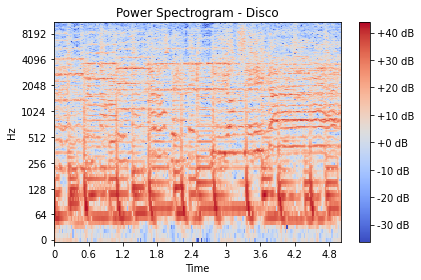

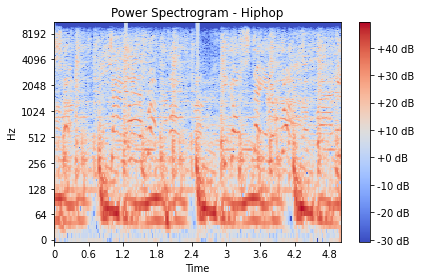

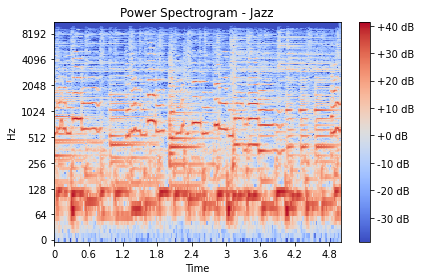

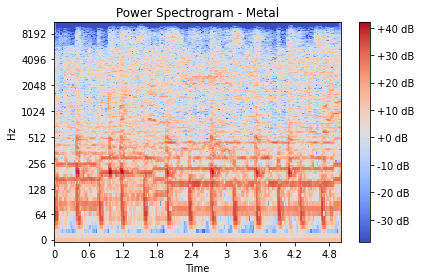

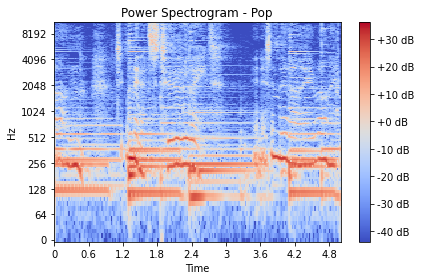

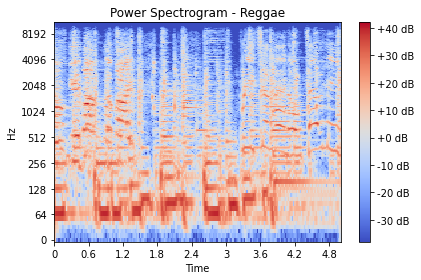

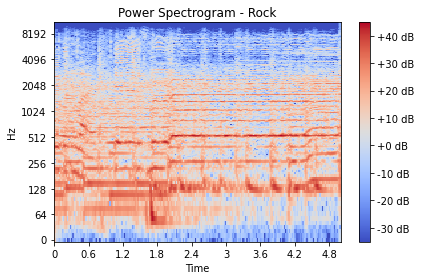

In [ ]:
# Generate Power Spectograms for all Genres

for i, genre in enumerate(genres):
    y, sr = librosa.load(genre + '/' + genre + '.00005.wav', duration=5.0, sr=None,)
    
    librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y)), ref=1.0), y_axis='log', x_axis='time')
    plt.title("Power Spectrogram - " + genre.capitalize())
    plt.colorbar(format = '%+2.0f dB')
    plt.tight_layout()
    # plt.savefig(fname=genre+'_power_spectrogram',dpi=200)
    plt.show()

In [ ]:
os.chdir('/home/anonymous/478/Data/genres_original')
os.getcwd()

'/home/anonymous/478/Data/genres_original'

<Figure size 432x288 with 0 Axes>

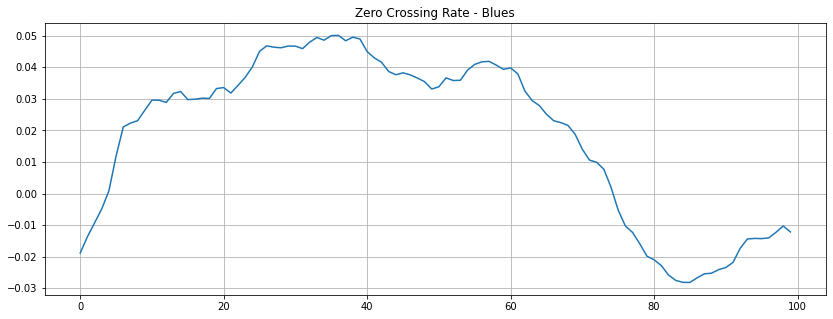

<Figure size 432x288 with 0 Axes>

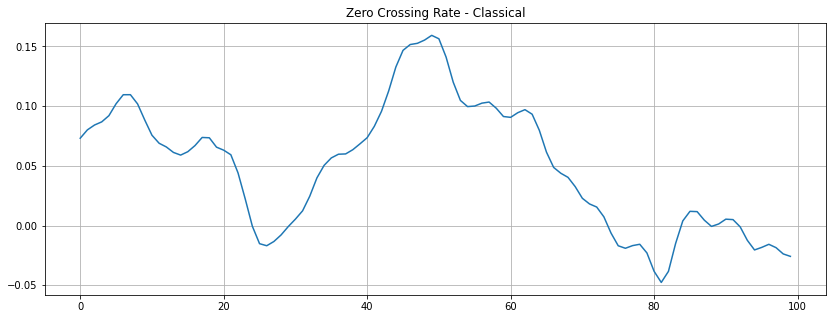

<Figure size 432x288 with 0 Axes>

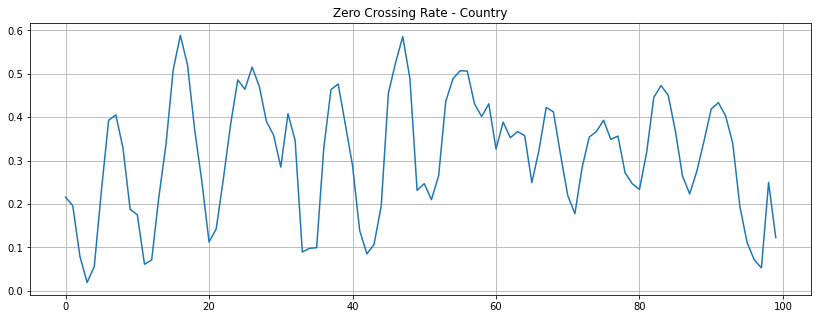

<Figure size 432x288 with 0 Axes>

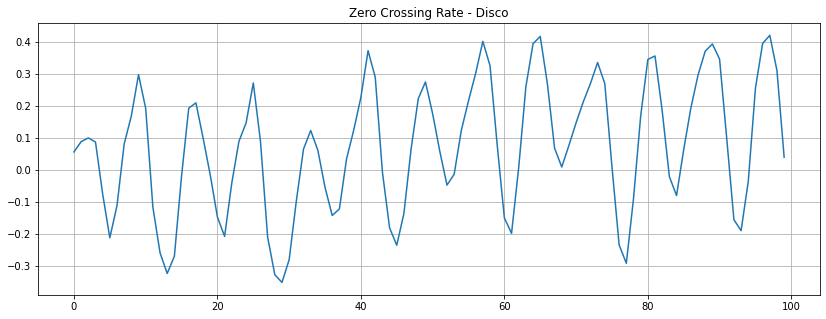

<Figure size 432x288 with 0 Axes>

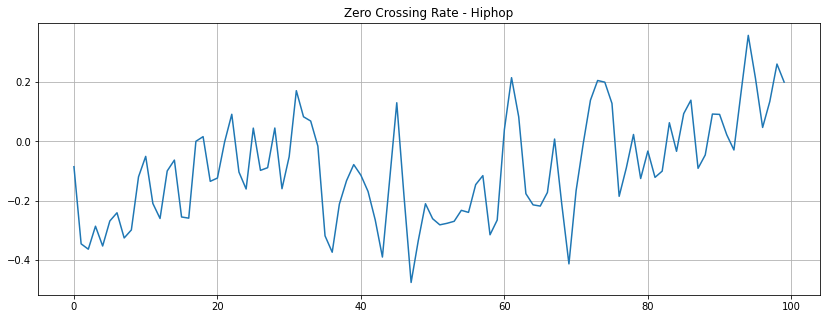

<Figure size 432x288 with 0 Axes>

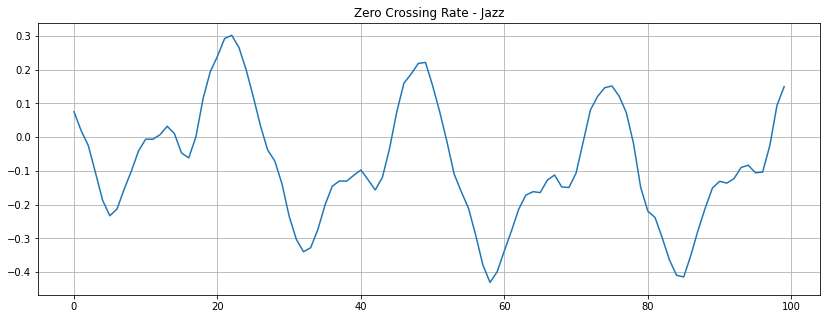

<Figure size 432x288 with 0 Axes>

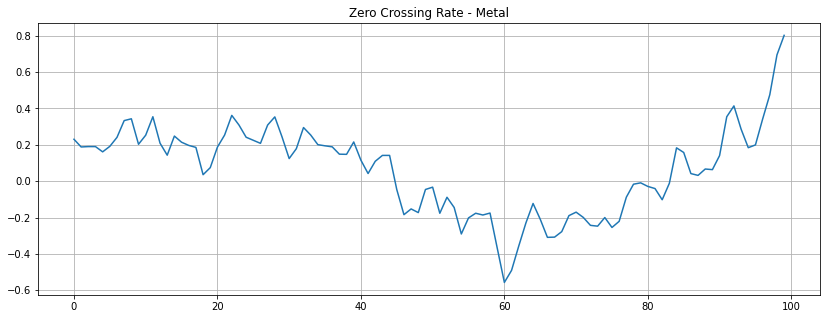

<Figure size 432x288 with 0 Axes>

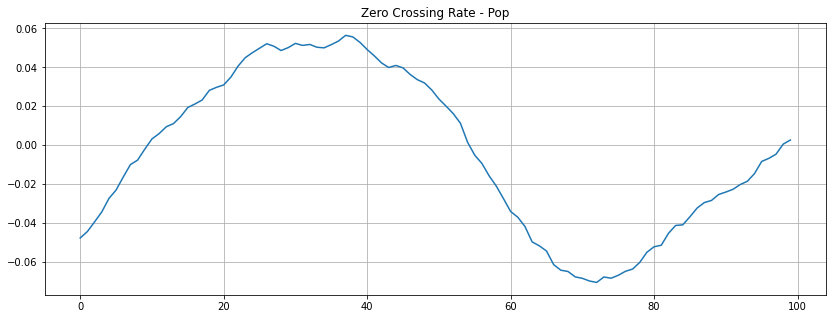

<Figure size 432x288 with 0 Axes>

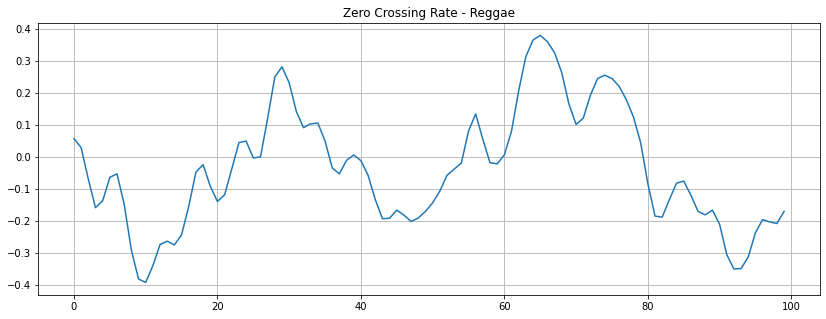

<Figure size 432x288 with 0 Axes>

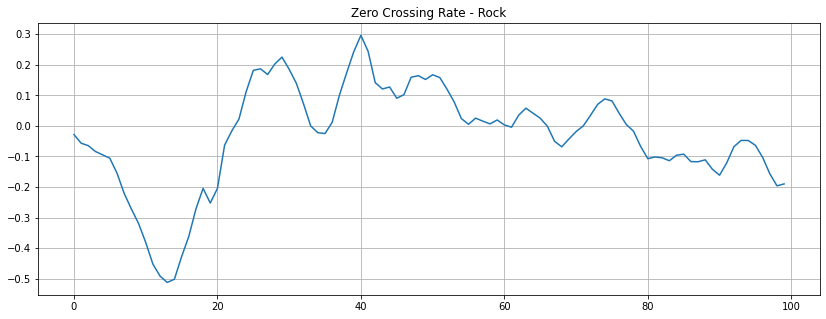

In [ ]:
#Generate Zero Crossing Rate graphs for all the genres
for i, genre in enumerate(genres):
    x, sr = librosa.load(genre + '/' + genre + '.00005.wav', duration=5.0, sr=None,)
    
    n0 = 9000
    n1 = 9100
    plt.tight_layout()
    plt.figure(figsize=(14, 5))
    plt.plot(x[n0:n1])
    plt.grid()

    plt.title("Zero Crossing Rate - " + genre.capitalize())
  
    # plt.savefig(fname=genre+'_power_spectrogram',dpi=200)
    plt.show()

    # Find the exact zero crossing rate with librosa
    
    # zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    # print(sum(zero_crossings))

/tmp/ipykernel_1236/1392860862.py:2: FutureWarning: Pass y=[ 0.05627441  0.09179688  0.10171509 ... -0.27719116 -0.3069458
 -0.3355713 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids=librosa.feature.spectral_centroid(x,sr=sr) [0]
/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[-0.01429199 -0.01975464  0.00038696 ... -0.12632202 -0.12946533
 -0.13175415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


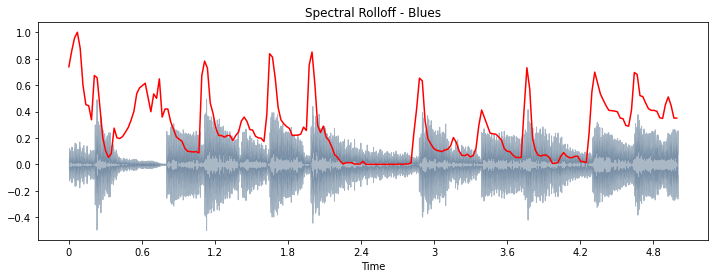

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[-0.01459717 -0.03446411 -0.03428101 ... -0.00223755  0.01262451
  0.01134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


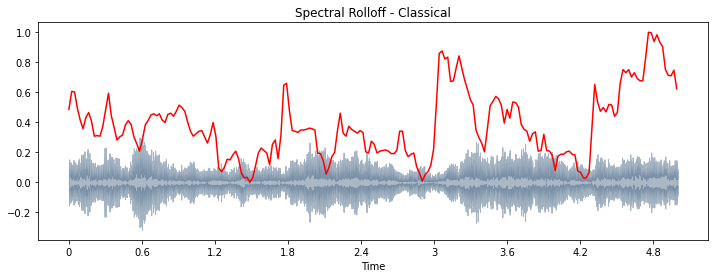

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[-0.3946631  -0.30704713 -0.2543738  ...  0.26344848  0.3207605
  0.34364867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


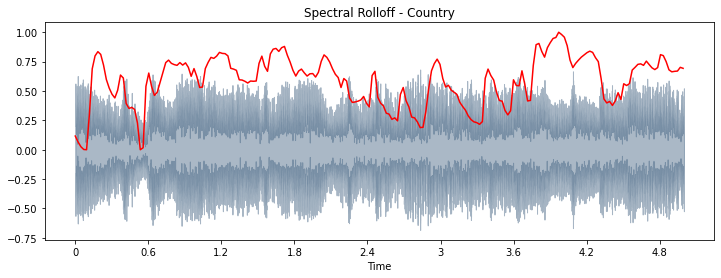

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[ 0.33540893  0.36195922  0.27452636 ... -0.05195069 -0.18534301
 -0.19236206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


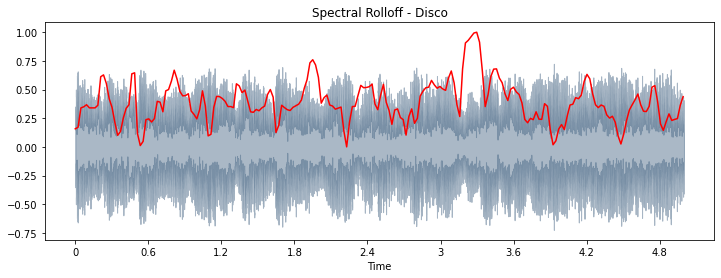

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[-0.39853883 -0.34122682 -0.29819703 ... -0.3809302   0.0339563
  0.1764734 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


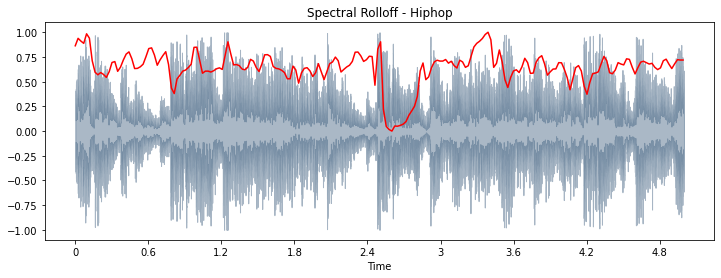

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[0.07652832 0.17467286 0.2419336  ... 0.11702514 0.12633301 0.18172242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


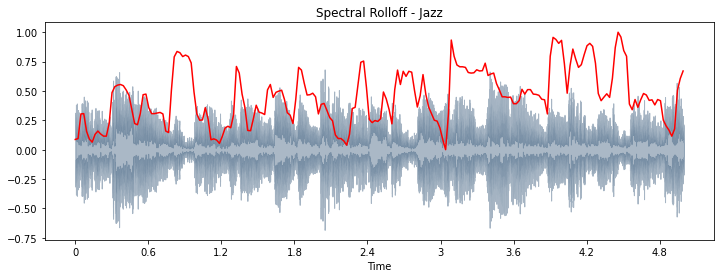

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[-0.23032592 -0.27491212 -0.29215455 ...  0.0558374   0.09123779
  0.12016845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


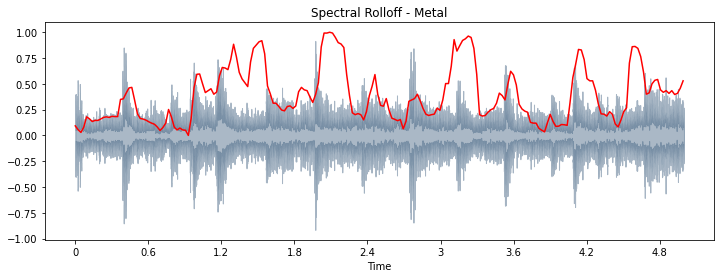

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[0.05498291 0.05544067 0.0551355  ... 0.00746704 0.00917603 0.01094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


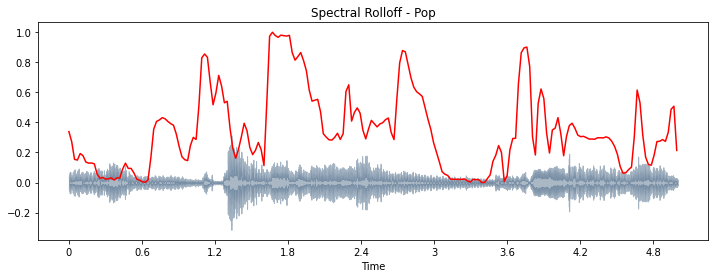

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[0.24120118 0.26952147 0.08669067 ... 0.20653321 0.1650293  0.11214233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


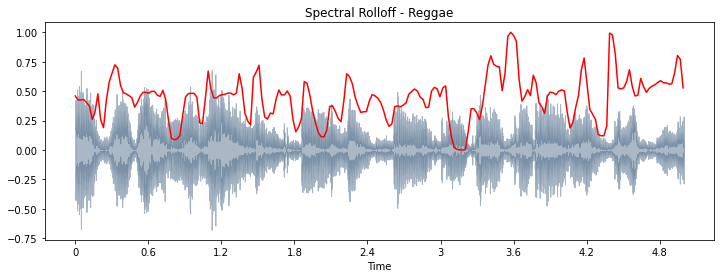

/tmp/ipykernel_1236/1392860862.py:11: FutureWarning: Pass y=[ 0.06627441  0.10179687  0.11171509 ... -0.26719117 -0.2969458
 -0.3255713 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]


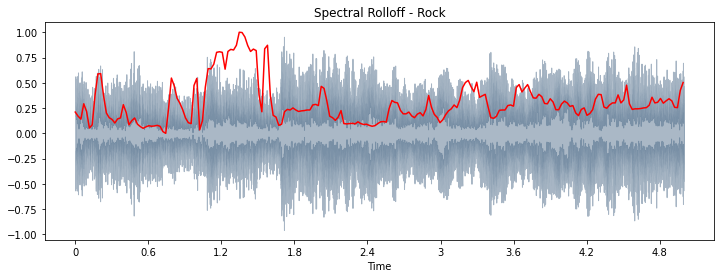

In [ ]:
# Generate Spectral Centroid graphs for all the genres

spectral_centroids=librosa.feature.spectral_centroid(x,sr=sr) [0]
frames=range(len(spectral_centroids))
t=librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x,axis=axis)
    
for i, genre in enumerate(genres):
    data, sr = librosa.load(genre + '/' + genre + '.00005.wav', duration=5.0, sr=None,)
    
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr) [0]
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

    plt.title("Spectral Rolloff - " + genre.capitalize())
    plt.plot(t, normalize(spectral_rolloff), color='r')
  
    # plt.savefig(fname=genre+'_power_spectrogram',dpi=200)
    plt.show()

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ... -0.13632202 -0.13946533
 -0.14175415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


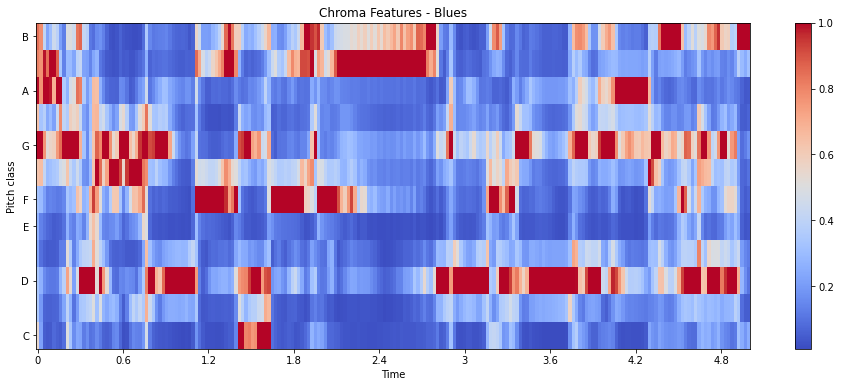

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[-0.02459717 -0.04446411 -0.04428101 ... -0.01223755  0.00262451
  0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


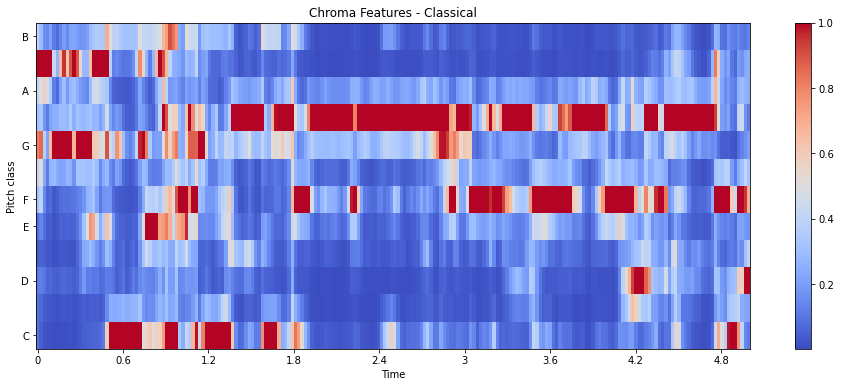

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[-0.4046631  -0.31704712 -0.26437378 ...  0.2534485   0.3107605
  0.33364868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


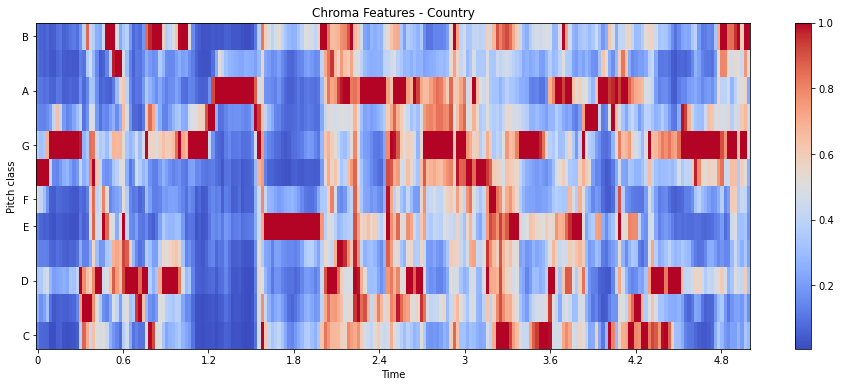

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[ 0.32540894  0.35195923  0.26452637 ... -0.06195068 -0.19534302
 -0.20236206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


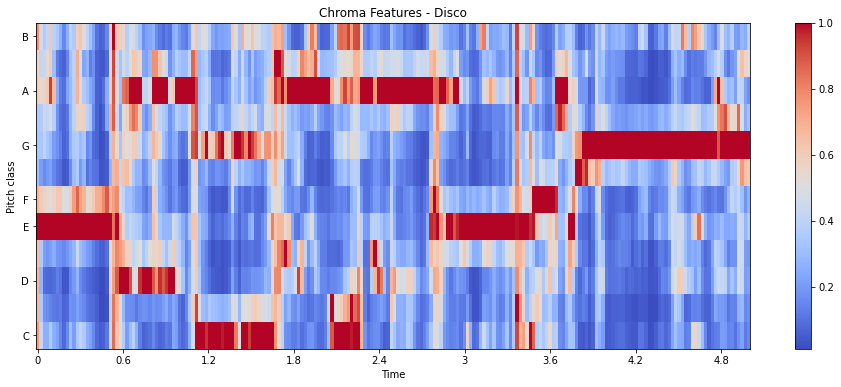

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[-0.40853882 -0.3512268  -0.30819702 ... -0.39093018  0.0239563
  0.16647339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


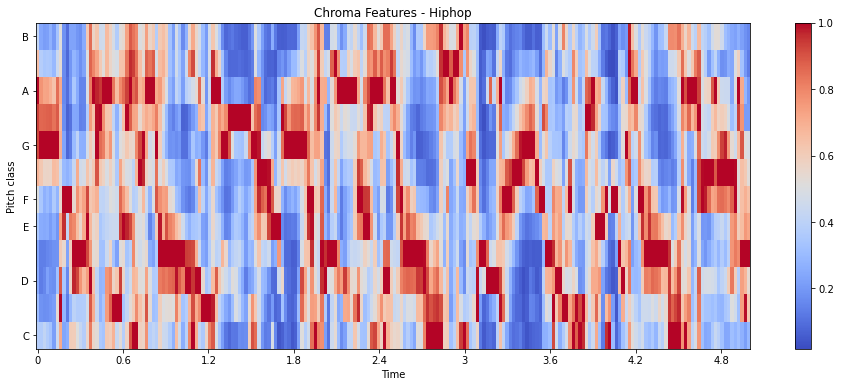

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[0.06652832 0.16467285 0.2319336  ... 0.10702515 0.11633301 0.17172241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


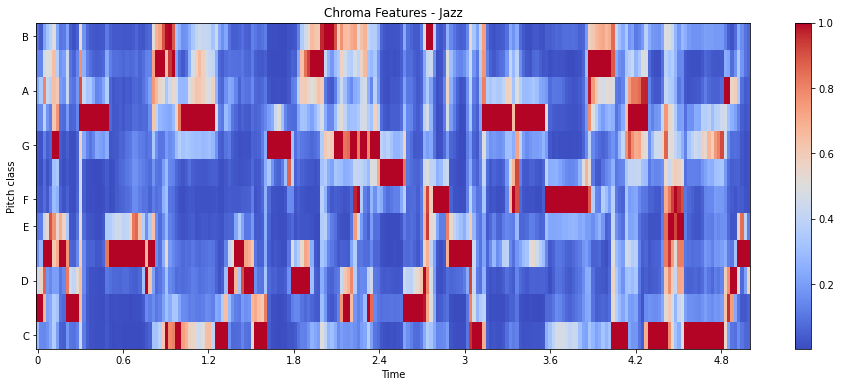

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[-0.24032593 -0.2849121  -0.30215454 ...  0.0458374   0.08123779
  0.11016846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


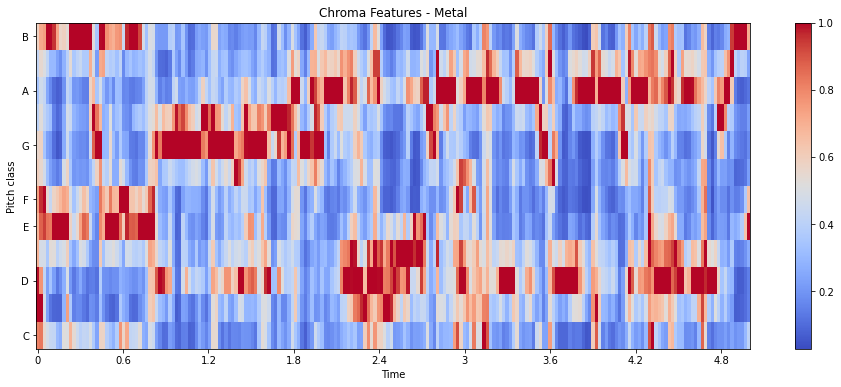

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[ 0.04498291  0.04544067  0.0451355  ... -0.00253296 -0.00082397
  0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


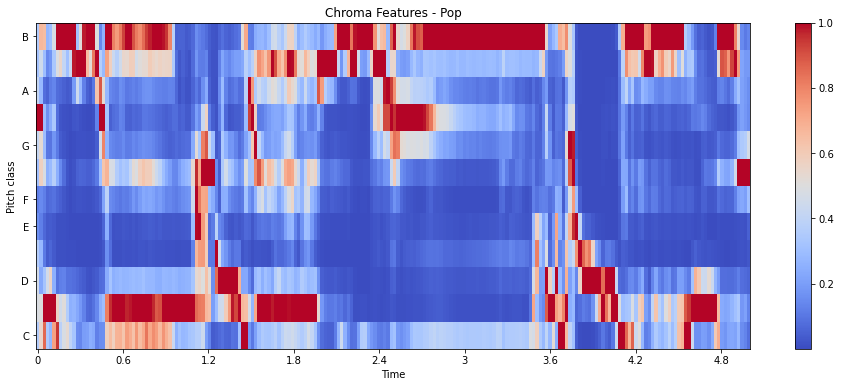

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[0.23120117 0.25952148 0.07669067 ... 0.1965332  0.1550293  0.10214233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


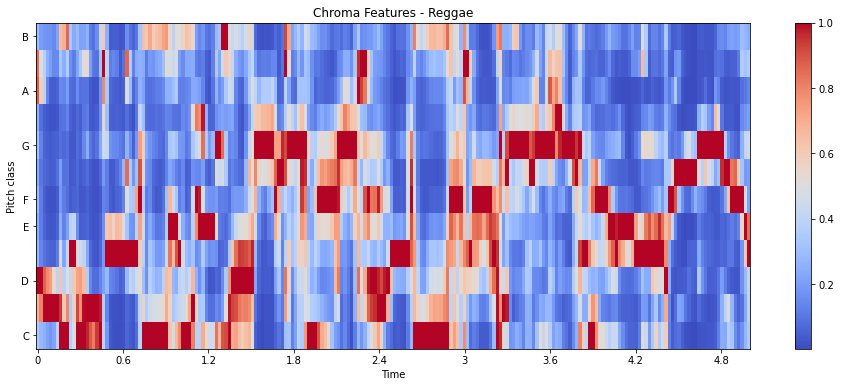

/tmp/ipykernel_1236/258078837.py:6: FutureWarning: Pass y=[ 0.05627441  0.09179688  0.10171509 ... -0.27719116 -0.3069458
 -0.3355713 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


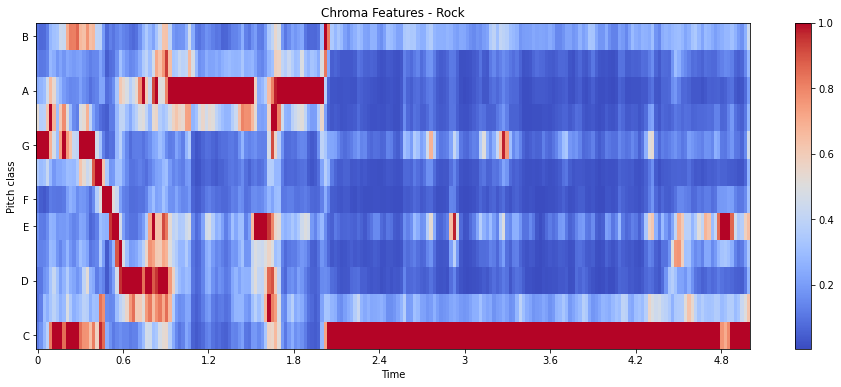

In [ ]:
#Generate Chroma Features for all Genres

for i, genre in enumerate(genres):
    data, sr = librosa.load(genre + '/' + genre + '.00005.wav', duration=5.0, sr=None,)
    
    chroma = librosa.feature.chroma_stft(data, sr=sr)
    plt.figure(figsize=(16,6))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()

    plt.title("Chroma Features - " + genre.capitalize())
  
    # plt.savefig(fname=genre+'_power_spectrogram',dpi=200)
    plt.show()

-------

# CNN Model

In [ ]:
os.chdir('/home/anonymous/478/Data')
os.getcwd()

'/home/anonymous/478/Data'

In [ ]:
df_3 = pd.read_csv('features_3_sec.csv')
df_3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df_30 = pd.read_csv('features_30_sec.csv')
df_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
df_3.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df_30.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df_3.shape

(9990, 60)

In [ ]:
df_30.shape

(1000, 60)

In [ ]:
df_3=df_3.drop(labels='filename',axis = 1)
df_30=df_30.drop(labels='filename',axis = 1)

In [ ]:
df_3.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
os.chdir('genres_original/blues')
os.getcwd()

'/home/anonymous/478/Data/genres_original/blues'

In [ ]:
audio = "blues.00005.wav"
data, sr = librosa.load(audio)
librosa.load(audio, sr =45600)

(array([-0.02408444, -0.03222815, -0.0304163 , ...,  0.02036326,
        -0.00116951, -0.00544476], dtype=float32),
 45600)

In [ ]:
class_list_3 = df_3.iloc[:, -1]
converter_3 = LabelEncoder()

class_list_30 = df_30.iloc[:, -1]
converter_30 = LabelEncoder()

In [ ]:
y_3 = converter_3.fit_transform(class_list_3)
y_30 = converter_30.fit_transform(class_list_30)

In [ ]:
print(df_3.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [ ]:
print(df_30.iloc[:,:-1])

     length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    661794          0.350088         0.088757  0.130228  0.002827   
1    661794          0.340914         0.094980  0.095948  0.002373   
2    661794          0.363637         0.085275  0.175570  0.002746   
3    661794          0.404785         0.093999  0.141093  0.006346   
4    661794          0.308526         0.087841  0.091529  0.002303   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1

In [ ]:
fit_3 = StandardScaler()
X_3 = fit_3.fit_transform(np.array(df_3.iloc[:,:-1], dtype = float))

In [ ]:
fit_30 = StandardScaler()
X_30 = fit_30.fit_transform(np.array(df_30.iloc[:,:-1], dtype = float))

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20)

In [ ]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_30, y_30, test_size=0.20)

In [ ]:
def train_3(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model.fit(X_train_3, y_train_3, validation_data = (X_test_3, y_test_3), epochs=epochs, batch_size=batch_size)

In [ ]:
def train_30(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model.fit(X_train_30, y_train_30, validation_data = (X_test_30, y_test_30), epochs=epochs, batch_size=batch_size)

In [ ]:
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train_3.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_history_3=train_3(model=model_3, epochs=800, optimizer='adam')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 512)               30208     
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dropout_37 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)               

In [ ]:
model_30 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train_30.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_30.summary())
model_history_30=train_30(model=model_30, epochs=800, optimizer='adam')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 512)               30208     
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               32896     
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 64)              

In [ ]:
test_loss_3, test_acc_3 = model_3.evaluate(X_test_3, y_test_3, batch_size=128)
print("Test Loss is: ", test_loss_3)
print("Accuracy: ", test_acc_3*100)

16/16 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.9364
Test Loss is:  0.5110282301902771
Accuracy:  93.6436414718628


In [ ]:
test_loss_30, test_acc_30 = model_30.evaluate(X_test_30, y_test_30, batch_size=128)
print("Test Loss is: ", test_loss_30)
print("Accuracy: ", test_acc_30*100)

2/2 [==============================] - 0s 3ms/step - loss: 2.1885 - accuracy: 0.7600
Test Loss is:  2.188535213470459
Accuracy:  75.99999904632568


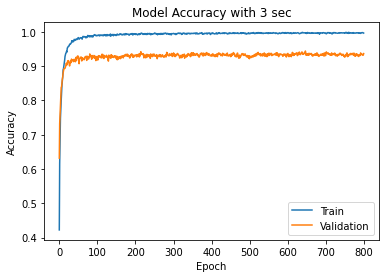

In [ ]:
plt.plot(model_history_3.history['accuracy'])
plt.plot(model_history_3.history['val_accuracy'])
plt.title("Model Accuracy with 3 sec")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

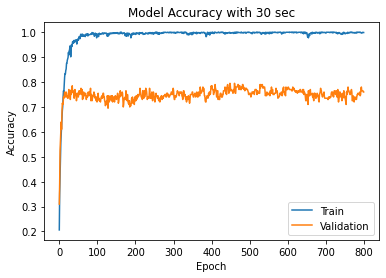

In [ ]:
plt.plot(model_history_30.history['accuracy'])
plt.plot(model_history_30.history['val_accuracy'])
plt.title("Model Accuracy with 30 sec")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()